<a href="https://colab.research.google.com/github/dekoska/machine-learning-bootcamp/blob/main/supervised/04_model_selection/03_grid_search.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import make_moons
import plotly.express as px

np.random.seed(42)
sns.set(font_scale=1.3)

In [18]:
raw_data = make_moons(n_samples=2000, noise=0.25, random_state=42)
data = raw_data[0]
target = raw_data[1]

In [20]:
df = pd.DataFrame(data=np.c_[data, target], columns=['x', 'y', 'target'])
df.head()

,x,y,target
0,1.582305,0.366876,1.0
1,0.327654,0.982366,0.0
2,0.488270,-0.246765,1.0
3,-0.937421,-0.029429,0.0
4,0.634397,-0.412224,1.0


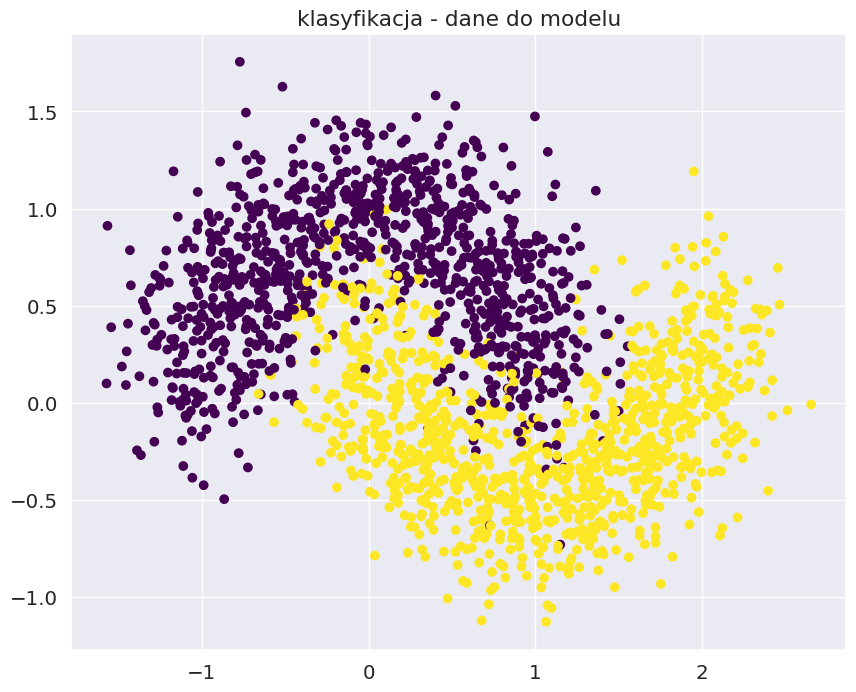

In [21]:
plt.figure(figsize=(10,8))
plt.scatter(data[:,0], data[:,1], c=target, cmap='viridis')
plt.title('klasyfikacja - dane do modelu')
plt.show()

In [22]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(data, target)

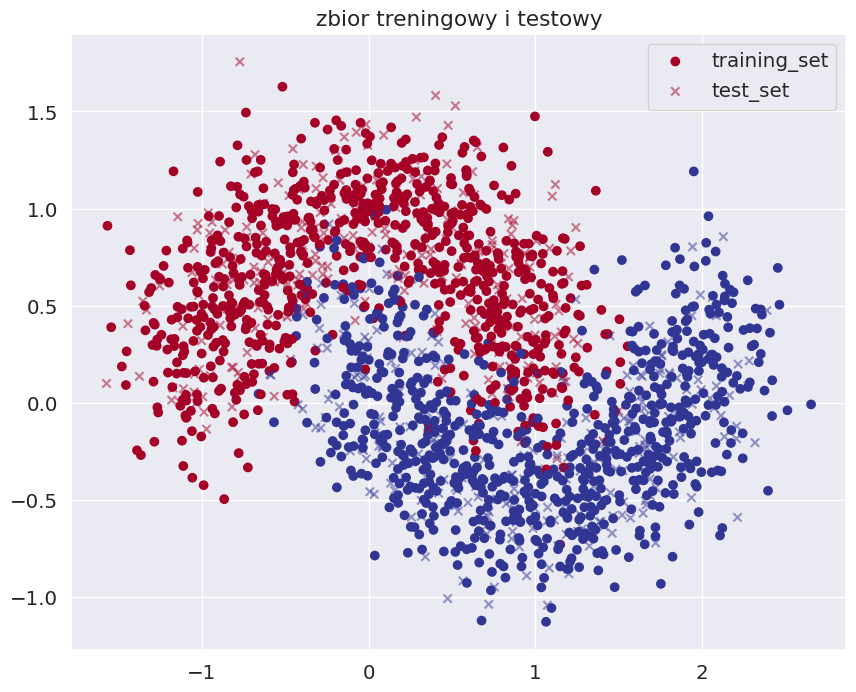

In [23]:
plt.figure(figsize=(10,8))
plt.scatter(X_train[:,0], X_train[:,1], c=y_train, cmap='RdYlBu', label='training_set')
plt.scatter(X_test[:,0], X_test[:,1], c=y_test, cmap='RdYlBu', marker='x', alpha=0.5, label='test_set')
plt.title('zbior treningowy i testowy')
plt.legend()
plt.show()

In [24]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV

classifier = DecisionTreeClassifier()

params = {'max_depth': np.arange(1,10),
          'min_samples_leaf': [1,2,3,4,5,6,7,8,9,10,15,20]}

grid_search = GridSearchCV(classifier, param_grid=params, scoring='accuracy',cv=5)
grid_search.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(),
             param_grid={'max_depth': array([1, 2, 3, 4, 5, 6, 7, 8, 9]),
                         'min_samples_leaf': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 15,
                                              20]},
             scoring='accuracy')

In [25]:
grid_search.best_params_

{'max_depth': 7, 'min_samples_leaf': 8}

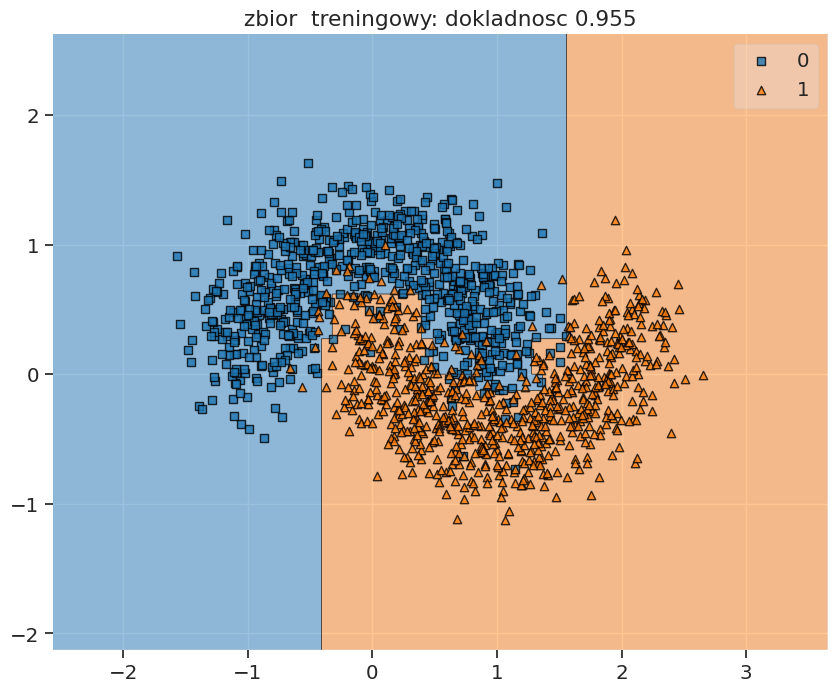

In [26]:
from mlxtend.plotting import plot_decision_regions

plt.figure(figsize=(10,8))
plot_decision_regions(X_train, y_train, grid_search)
plt.title(f'zbior  treningowy: dokladnosc {grid_search.score(X_train, y_train):.3f}')
plt.show()

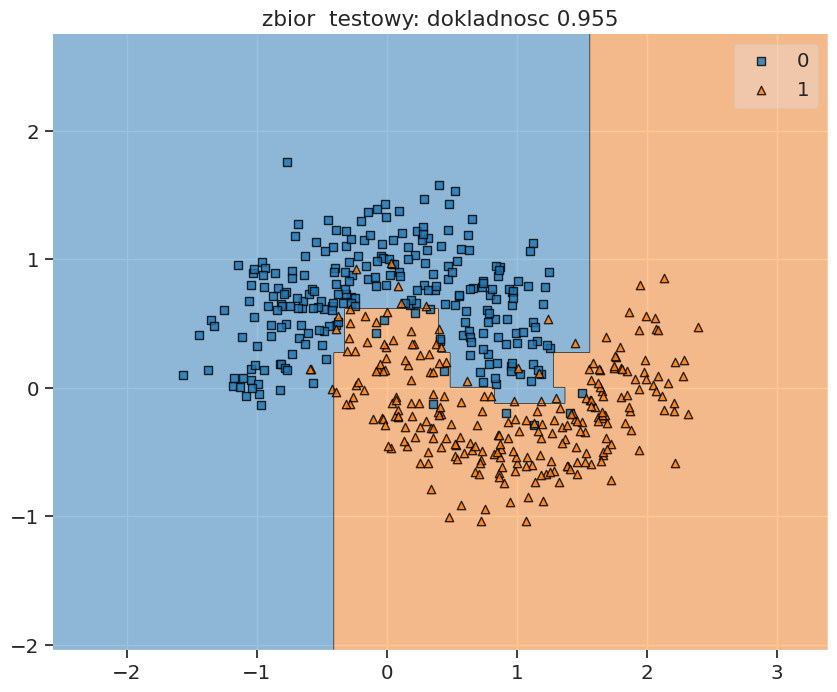

In [27]:
plt.figure(figsize=(10,8))
plot_decision_regions(X_test, y_test, grid_search)
plt.title(f'zbior  testowy: dokladnosc {grid_search.score(X_train, y_train):.3f}')
plt.show()

In [28]:
classifier = DecisionTreeClassifier(random_state=42)

param_grid = {'criterion': ['gini', 'entropy'],
              'max_depth': np.arange(1, 10),
              'min_samples_leaf': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 15, 20]}

grid_search = GridSearchCV(classifier, param_grid=param_grid, n_jobs=-1, scoring='accuracy', cv=5)
grid_search.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(random_state=42), n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': array([1, 2, 3, 4, 5, 6, 7, 8, 9]),
                         'min_samples_leaf': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 15,
                                              20]},
             scoring='accuracy')

In [29]:
grid_search.best_params_

{'criterion': 'entropy', 'max_depth': 8, 'min_samples_leaf': 10}

In [30]:
grid_search.best_estimator_

DecisionTreeClassifier(criterion='entropy', max_depth=8, min_samples_leaf=10,
                       random_state=42)

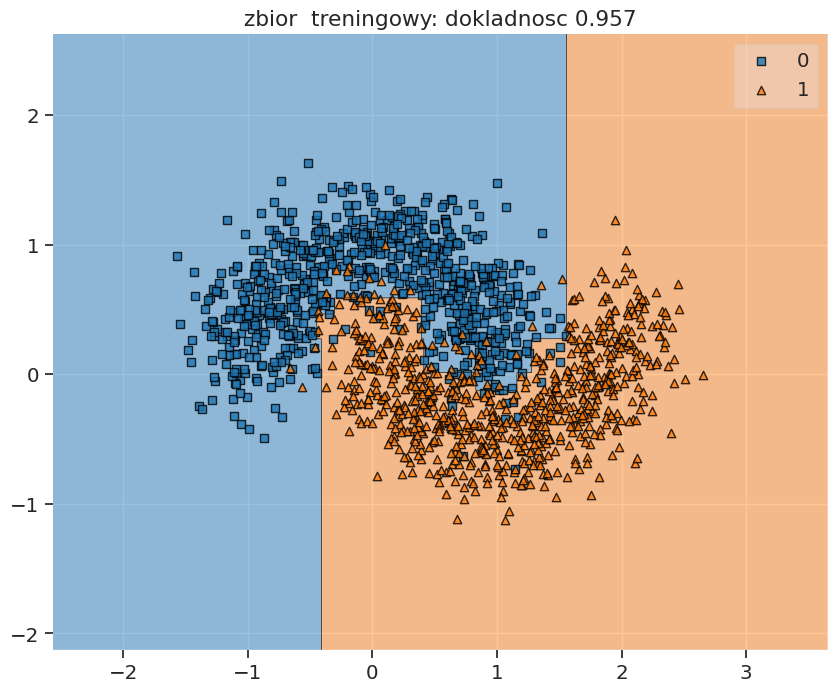

In [31]:
plt.figure(figsize=(10,8))
plot_decision_regions(X_train, y_train, grid_search)
plt.title(f'zbior  treningowy: dokladnosc {grid_search.score(X_train, y_train):.3f}')
plt.show()

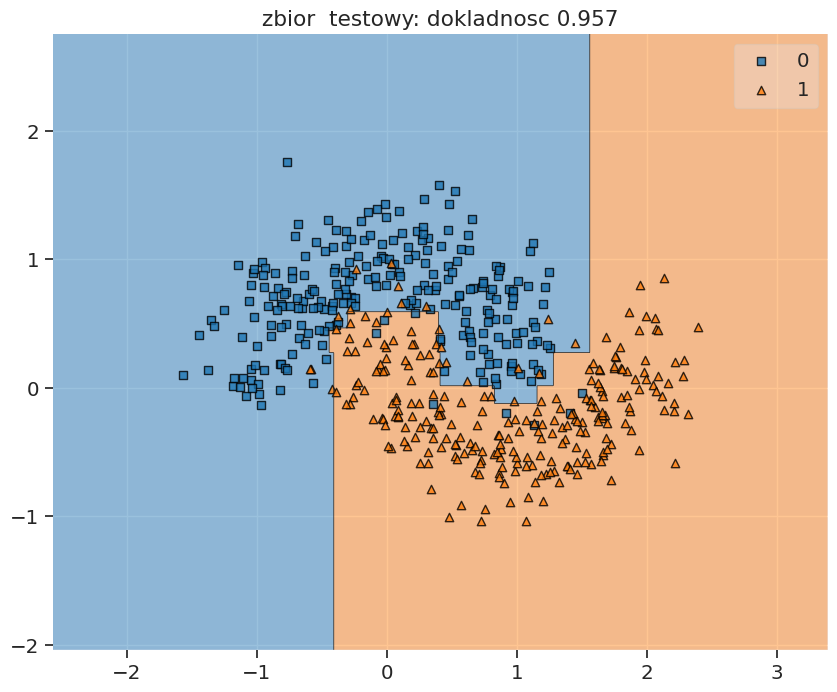

In [32]:
plt.figure(figsize=(10,8))
plot_decision_regions(X_test, y_test, grid_search)
plt.title(f'zbior  testowy: dokladnosc {grid_search.score(X_train, y_train):.3f}')
plt.show()

In [33]:
classifier = DecisionTreeClassifier(random_state=42)

param_grid = [
    {'criterion': ['gini'], 'max_depth': [1, 2, 3, 4, 5]},
    {'criterion': ['entropy'], 'min_samples_leaf': [2, 3, 4, 5]}
]

grid_search = GridSearchCV(classifier, param_grid=param_grid, n_jobs=-1, scoring='accuracy', cv=5)
grid_search.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(random_state=42), n_jobs=-1,
             param_grid=[{'criterion': ['gini'], 'max_depth': [1, 2, 3, 4, 5]},
                         {'criterion': ['entropy'],
                          'min_samples_leaf': [2, 3, 4, 5]}],
             scoring='accuracy')

In [34]:
grid_search.best_params_

{'criterion': 'gini', 'max_depth': 5}

In [35]:
grid_search.best_estimator_

DecisionTreeClassifier(max_depth=5, random_state=42)

In [36]:
from sklearn.ensemble import RandomForestClassifier

classifier = RandomForestClassifier(random_state=42)

param_grid = {
    'criterion': ['gini', 'entropy'],
    'max_depth': np.arange(4, 10),
    'min_samples_leaf': [4, 5, 6, 7, 8, 9, 10],
    'n_estimators': [50]
}

grid_search = GridSearchCV(classifier, param_grid=param_grid, n_jobs=-1, scoring='accuracy', cv=5)
grid_search.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=RandomForestClassifier(random_state=42), n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': array([4, 5, 6, 7, 8, 9]),
                         'min_samples_leaf': [4, 5, 6, 7, 8, 9, 10],
                         'n_estimators': [50]},
             scoring='accuracy')

In [37]:
grid_search.best_params_

{'criterion': 'entropy',
 'max_depth': 8,
 'min_samples_leaf': 7,
 'n_estimators': 50}

Text(0.5, 1.0, 'Zbiór treningowy: dokładność 0.9600')

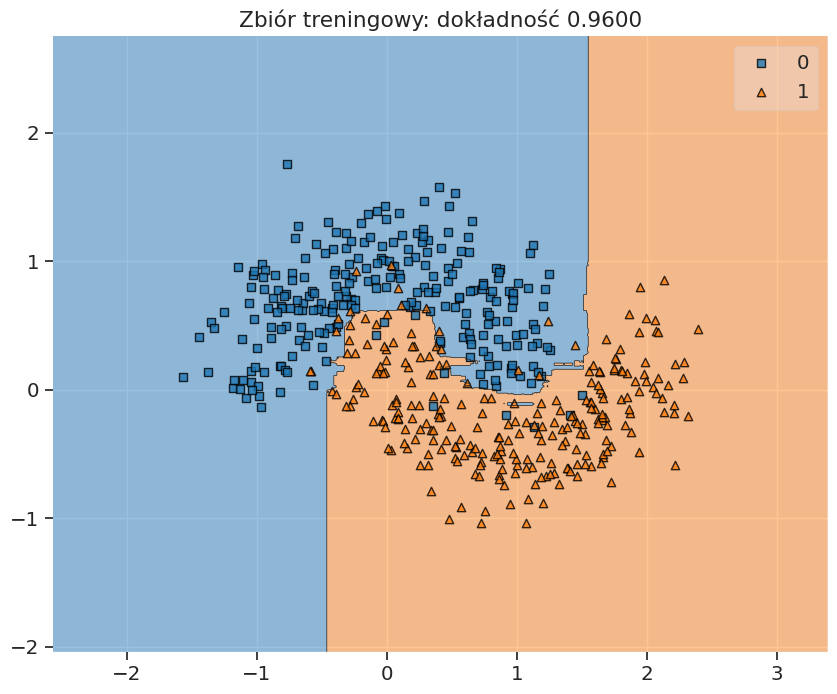

In [38]:
plt.figure(figsize=(10, 8))
plot_decision_regions(X_test, y_test, grid_search)
plt.title(f'Zbiór treningowy: dokładność {grid_search.score(X_train, y_train):.4f}')

Text(0.5, 1.0, 'Zbiór testowy: dokładność 0.9480')

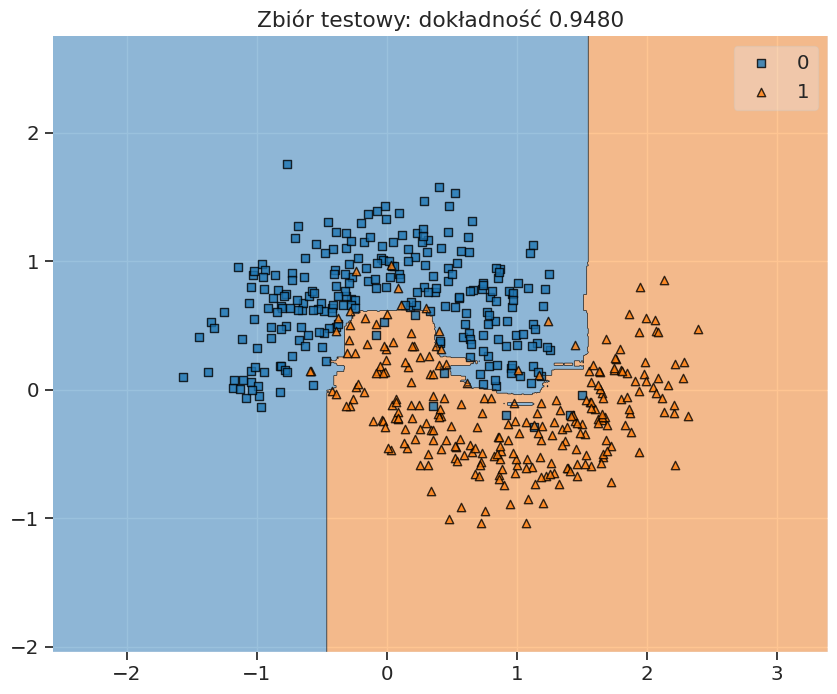

In [39]:
plt.figure(figsize=(10, 8))
plot_decision_regions(X_test, y_test, grid_search)
plt.title(f'Zbiór testowy: dokładność {grid_search.score(X_test, y_test):.4f}')